In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './..')
sys.path.insert(0, './../scripts')

In [2]:
from importlib import reload

import pickle

import numpy as np
import tensorflow as tf
import logging
from scipy import linalg

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1 import make_axes_locatable

import plot_func as pf
import util_func as uf

import dev_ori_sel_RF
from dev_ori_sel_RF import data_dir,integrator_tf,dynamics,run_full_plastic,probe_RFs
from dev_ori_sel_RF.tools import misc,update_params_dict,analysis_tools
import dev_ori_sel_RF.network_full_plastic as network

2023-07-17 23:15:23.192741: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Please install GPU version of TF
Please install GPU version of TF


In [3]:
def get_network_size(config_name):
    config_dict = misc.load_external_params("params_"+config_name)
    config_dict.update({"config_name" : config_name})

    N4 = config_dict["N4"]
    Nlgn = config_dict["Nlgn"]
    Nret = config_dict["Nret"]
    Nlgnpop = 2
    N4pop = config_dict["num_lgn_paths"] // Nlgnpop
    
    return config_dict,N4pop,Nlgnpop,Nret,Nlgn,N4

def get_network_system(Version,config_name):
    if Version == -1:
        config_dict = misc.load_external_params("params_"+config_name,False)
        config_dict.update({
                        "RF_mode" : "initialize",
                        "system" : "one_layer",
                        "Version" : Version,
                        })
        net = network.Network(Version,config_dict,verbose=False)
    else:
        load_location = 'local'
        load_path = data_dir + "layer4/{s}/v{v}/".format(s=config_name,v=Version)
        config_dict = pickle.load(open(load_path + "config_v{v}.p".format(v=Version),"rb"))
        config_dict.update({"config_name" : config_name})
        config_dict["Wlgn_to4_params"].update({
            "W_mode": "load_from_external",
            "load_from_prev_run" : Version})
        net = network.Network(Version,config_dict,load_location=load_location,verbose=False)
    return net.system

# Run

In [23]:
reload(run_full_plastic)
reload(integrator_tf)

config_name = "ffrec_test"

config_dict,N4pop,Nlgnpop,Nret,Nlgn,N4 = get_network_size(config_name)
config_dict.update({"config_name" : config_name})

Version = 0
run_full_plastic.parameter_sweep_ffrec(Version,config_dict,not_saving_temp=True)

Please install GPU version of TF
MISC params_dict params_ffrec_test {'Nret': 32, 'Nlgn': 32, 'N4': 32, 'N23': 1, 'Nvert': 1, 'runtime': 500, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'q_dict': True, 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.0225, 'sigma2': 0.06, 'ampl1': 2.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.03375, 'ampl': 1.0, 'profile':

In [6]:
config_name = "ffrec_test"

config_dict = misc.load_external_params("params_"+config_name)
config_dict.update({"config_name" : config_name})

config_dict["Wlgn_to4_params"].update({
    "W_mode": "load_from_external",
    "load_from_prev_run" : 0})
if "2pop" in config_dict["W4to4_params"]["Wrec_mode"]:
    config_dict["W4to4_params"].update({
        "Wrec_mode": "load_from_external2pop"})
else:
    config_dict["W4to4_params"].update({
        "Wrec_mode": "load_from_external"})

reload(run_full_plastic)
reload(integrator_tf)
Version = 1
run_full_plastic.parameter_sweep_ffrec(Version,config_dict,not_saving_temp=True)

MISC params_dict params_ffrec_test {'Nret': 32, 'Nlgn': 32, 'N4': 32, 'N23': 1, 'Nvert': 1, 'runtime': 32000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'q_dict': True, 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.0225, 'sigma2': 0.06, 'ampl1': 2.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.03375, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_eccentricity


KeyboardInterrupt



# Examine Final Weights

In [35]:
# with np.load('./../dev_ori_sel_RF/data/ffrec/'+config_name+'/v0/y_v0.npz') as data:
#     print(list(data.keys()))
#     print(data['Wrec'].shape)
#     Wlgnto4 = data['W'].reshape(-1,N4**2,Nlgn**2).reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)
#     W4to4 = data['Wrec'].reshape(N4pop,N4,N4,N4pop,N4,N4).transpose((0,3,1,2,4,5))

reload(uf)

_,Wlgnto4,arbor_on,arbor_off,arbor2,_,W4to4,arbor4to4,_ = uf.get_network_system_ffrec(0,config_name)

(4, 1024, 1024)


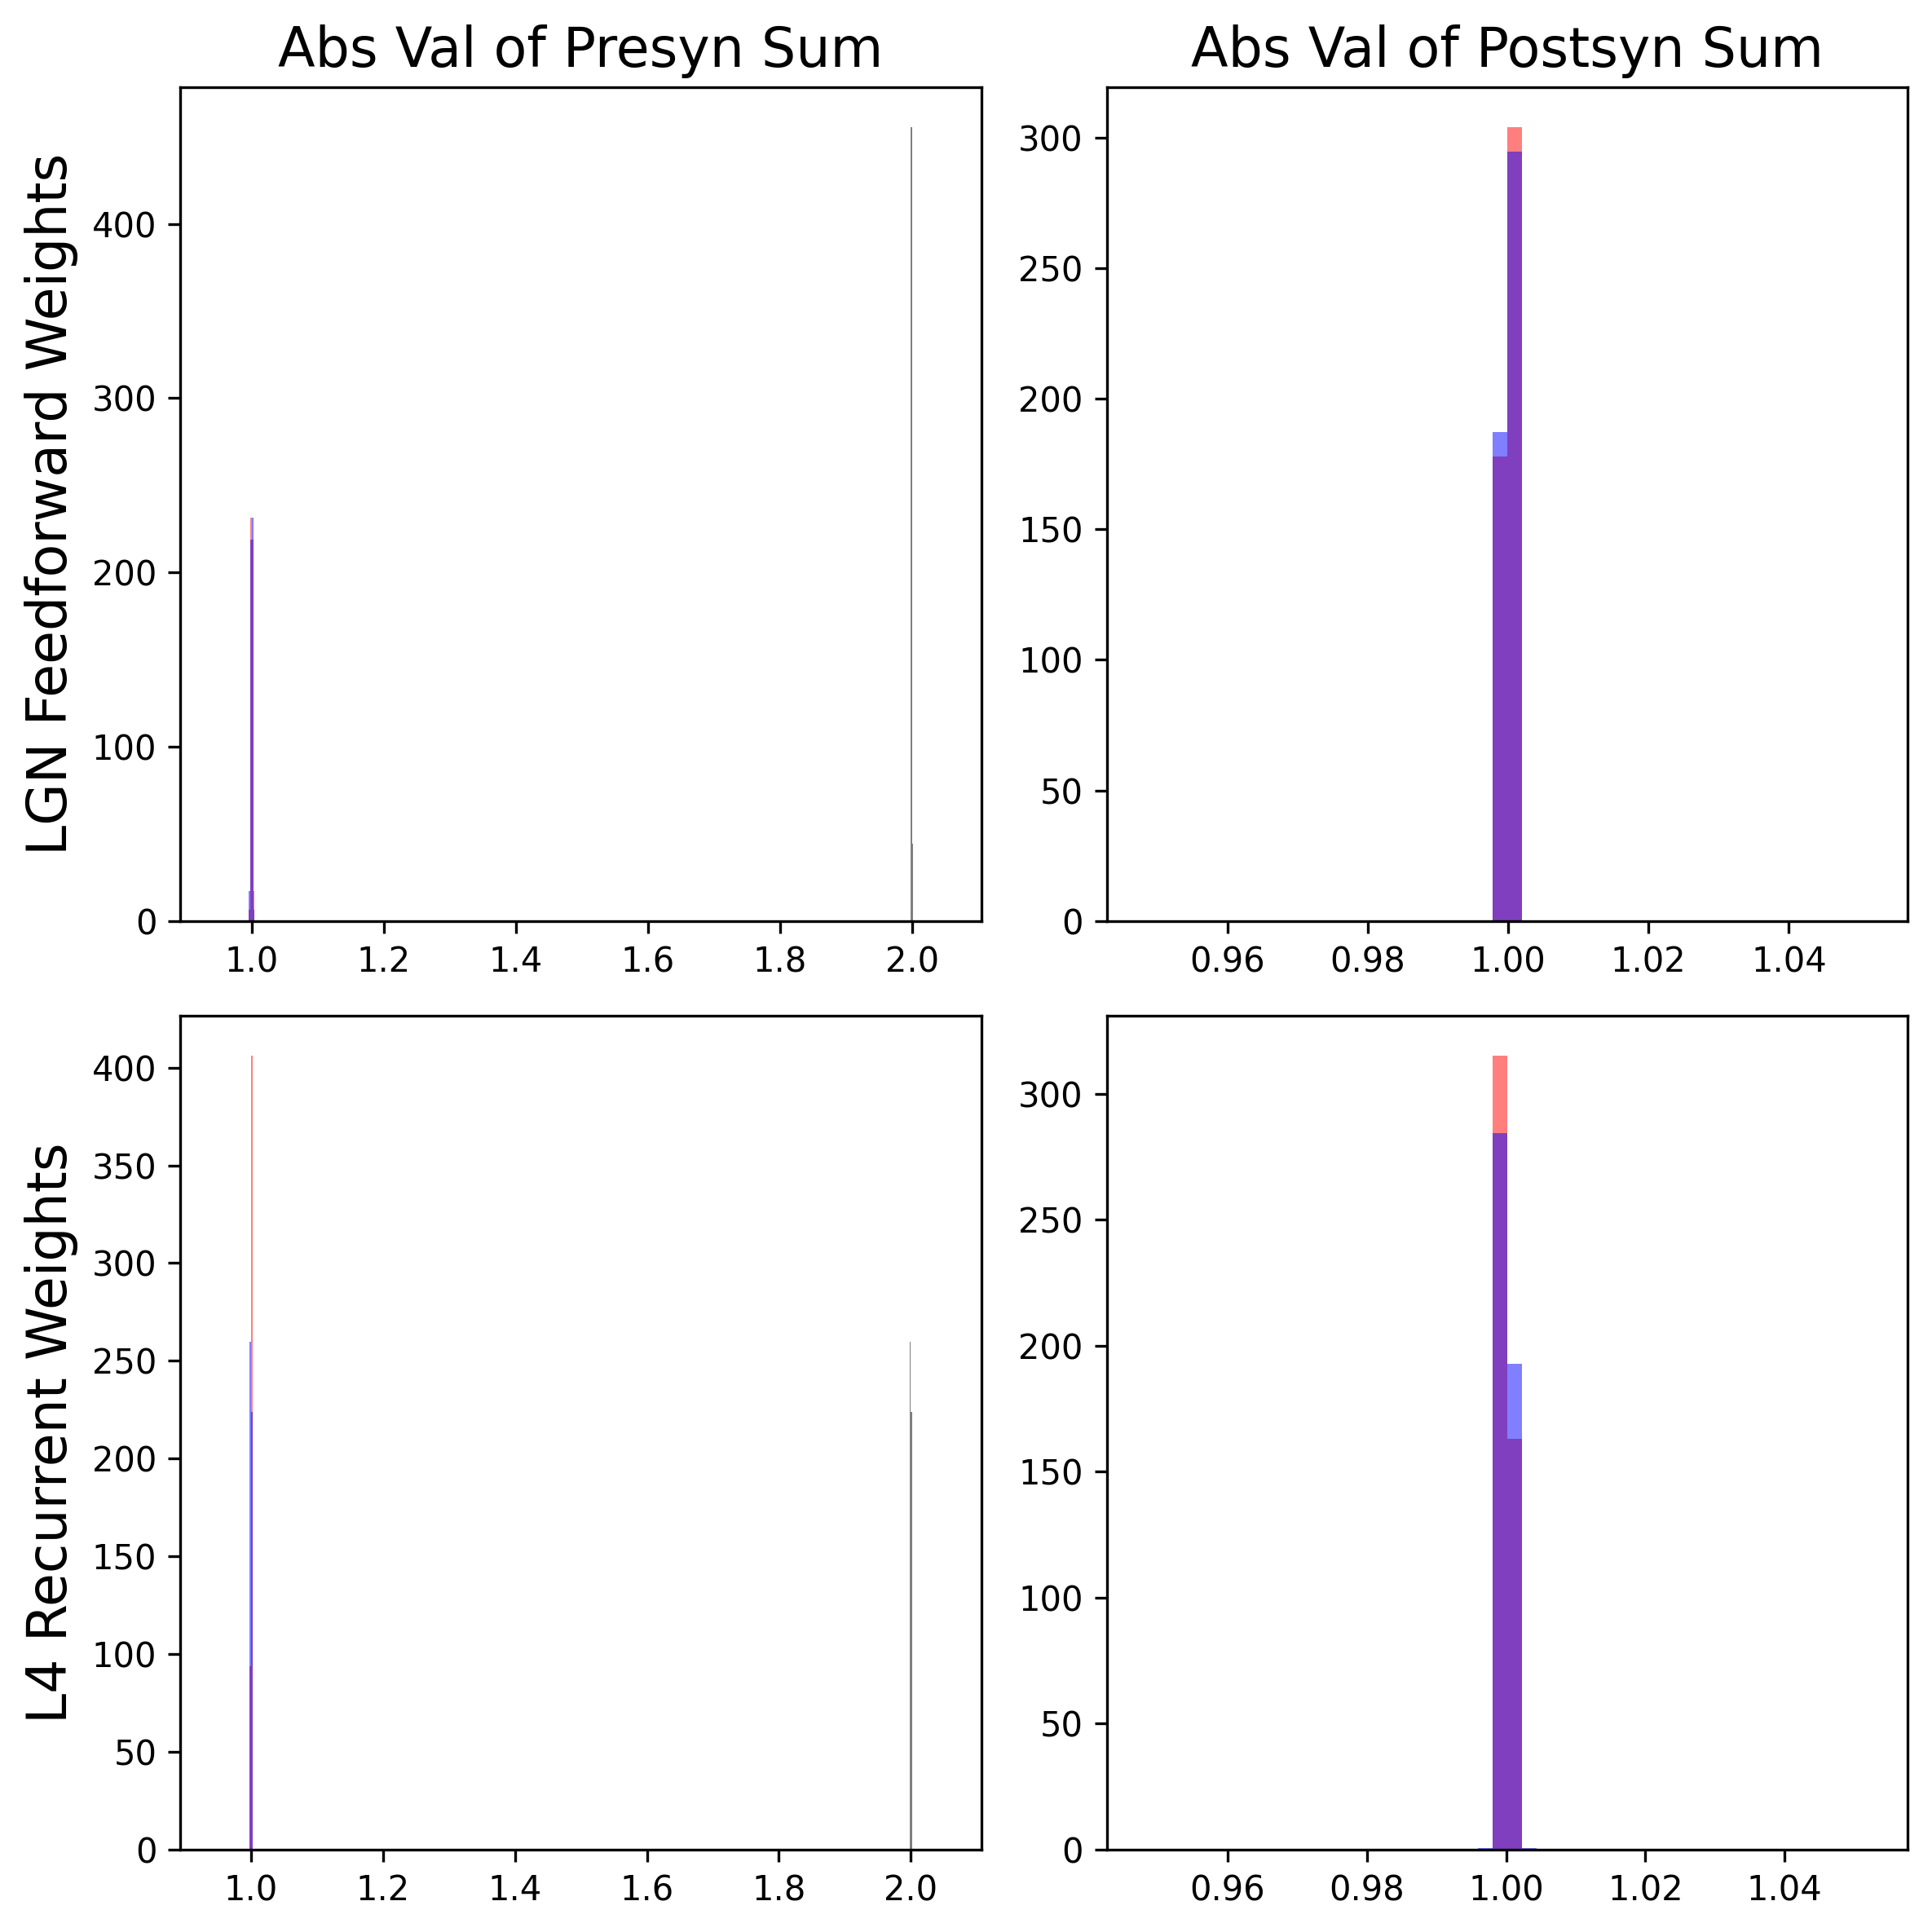

In [36]:
print(Wlgnto4.shape)
Wlgnto4.reshape(N4pop,Nlgnpop,N4*N4,Nlgn*Nlgn)
                
fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

Wpresum = Wlgnto4.reshape(N4pop,Nlgnpop,N4**2,Nlgn**2).sum((3))
Wpstsum = Wlgnto4.reshape(N4pop,Nlgnpop,N4**2,Nlgn**2).sum((2))
for i in range(2):
    axs[0,0].hist(Wpresum[0,i],
                  bins=np.linspace(np.min(Wpresum[0,i])-0.05,np.max(Wpresum[0,i])+0.05,51),
                  density=True,color=['r','b'][i],alpha=0.5)
    axs[0,1].hist(Wpstsum[0,i],
                  bins=np.linspace(np.min(Wpstsum)-0.05,np.max(Wpstsum)+0.05,51),
                  density=True,color=['r','b'][i],alpha=0.5)
axs[0,0].hist(Wpresum[0].sum(0),
              bins=np.linspace(np.min(Wpresum[0].sum(0))-0.05,np.max(Wpresum[0].sum(0))+0.05,51),
              density=True,color='k',alpha=0.5)

Wpresum = np.abs(W4to4.reshape(N4pop,N4**2,N4pop,N4**2).transpose((0,2,1,3)).sum((3)))
Wpstsum = np.abs(W4to4.reshape(N4pop,N4**2,N4pop,N4**2).transpose((0,2,1,3)).sum((2)))
for i in range(2):
    axs[1,0].hist(Wpresum[0,i],
                  bins=np.linspace(np.min(Wpresum[0,i])-0.05,np.max(Wpresum[0,i])+0.05,51),
                  density=True,color=['r','b'][i],alpha=0.5)
    axs[1,1].hist(Wpstsum[0,i],
                  bins=np.linspace(np.min(Wpstsum)-0.05,np.max(Wpstsum)+0.05,51),
                  density=True,color=['r','b'][i],alpha=0.5)
axs[1,0].hist(Wpresum[0].sum(0),
              bins=np.linspace(np.min(Wpresum[0].sum(0))-0.05,np.max(Wpresum[0].sum(0))+0.05,51),
              density=True,color='k',alpha=0.5)

axs[0,0].set_ylabel('LGN Feedforward Weights',fontsize=16)
axs[1,0].set_ylabel('L4 Recurrent Weights',fontsize=16)
axs[0,0].set_title('Abs Val of Presyn Sum',fontsize=16)
axs[0,1].set_title('Abs Val of Postsyn Sum',fontsize=16)

# fig.suptitle(r'Sum of Incoming and Outgoing Connections')
fig.tight_layout()

Text(0.5, 1.0, 'LGN Off Cell (Pre)')

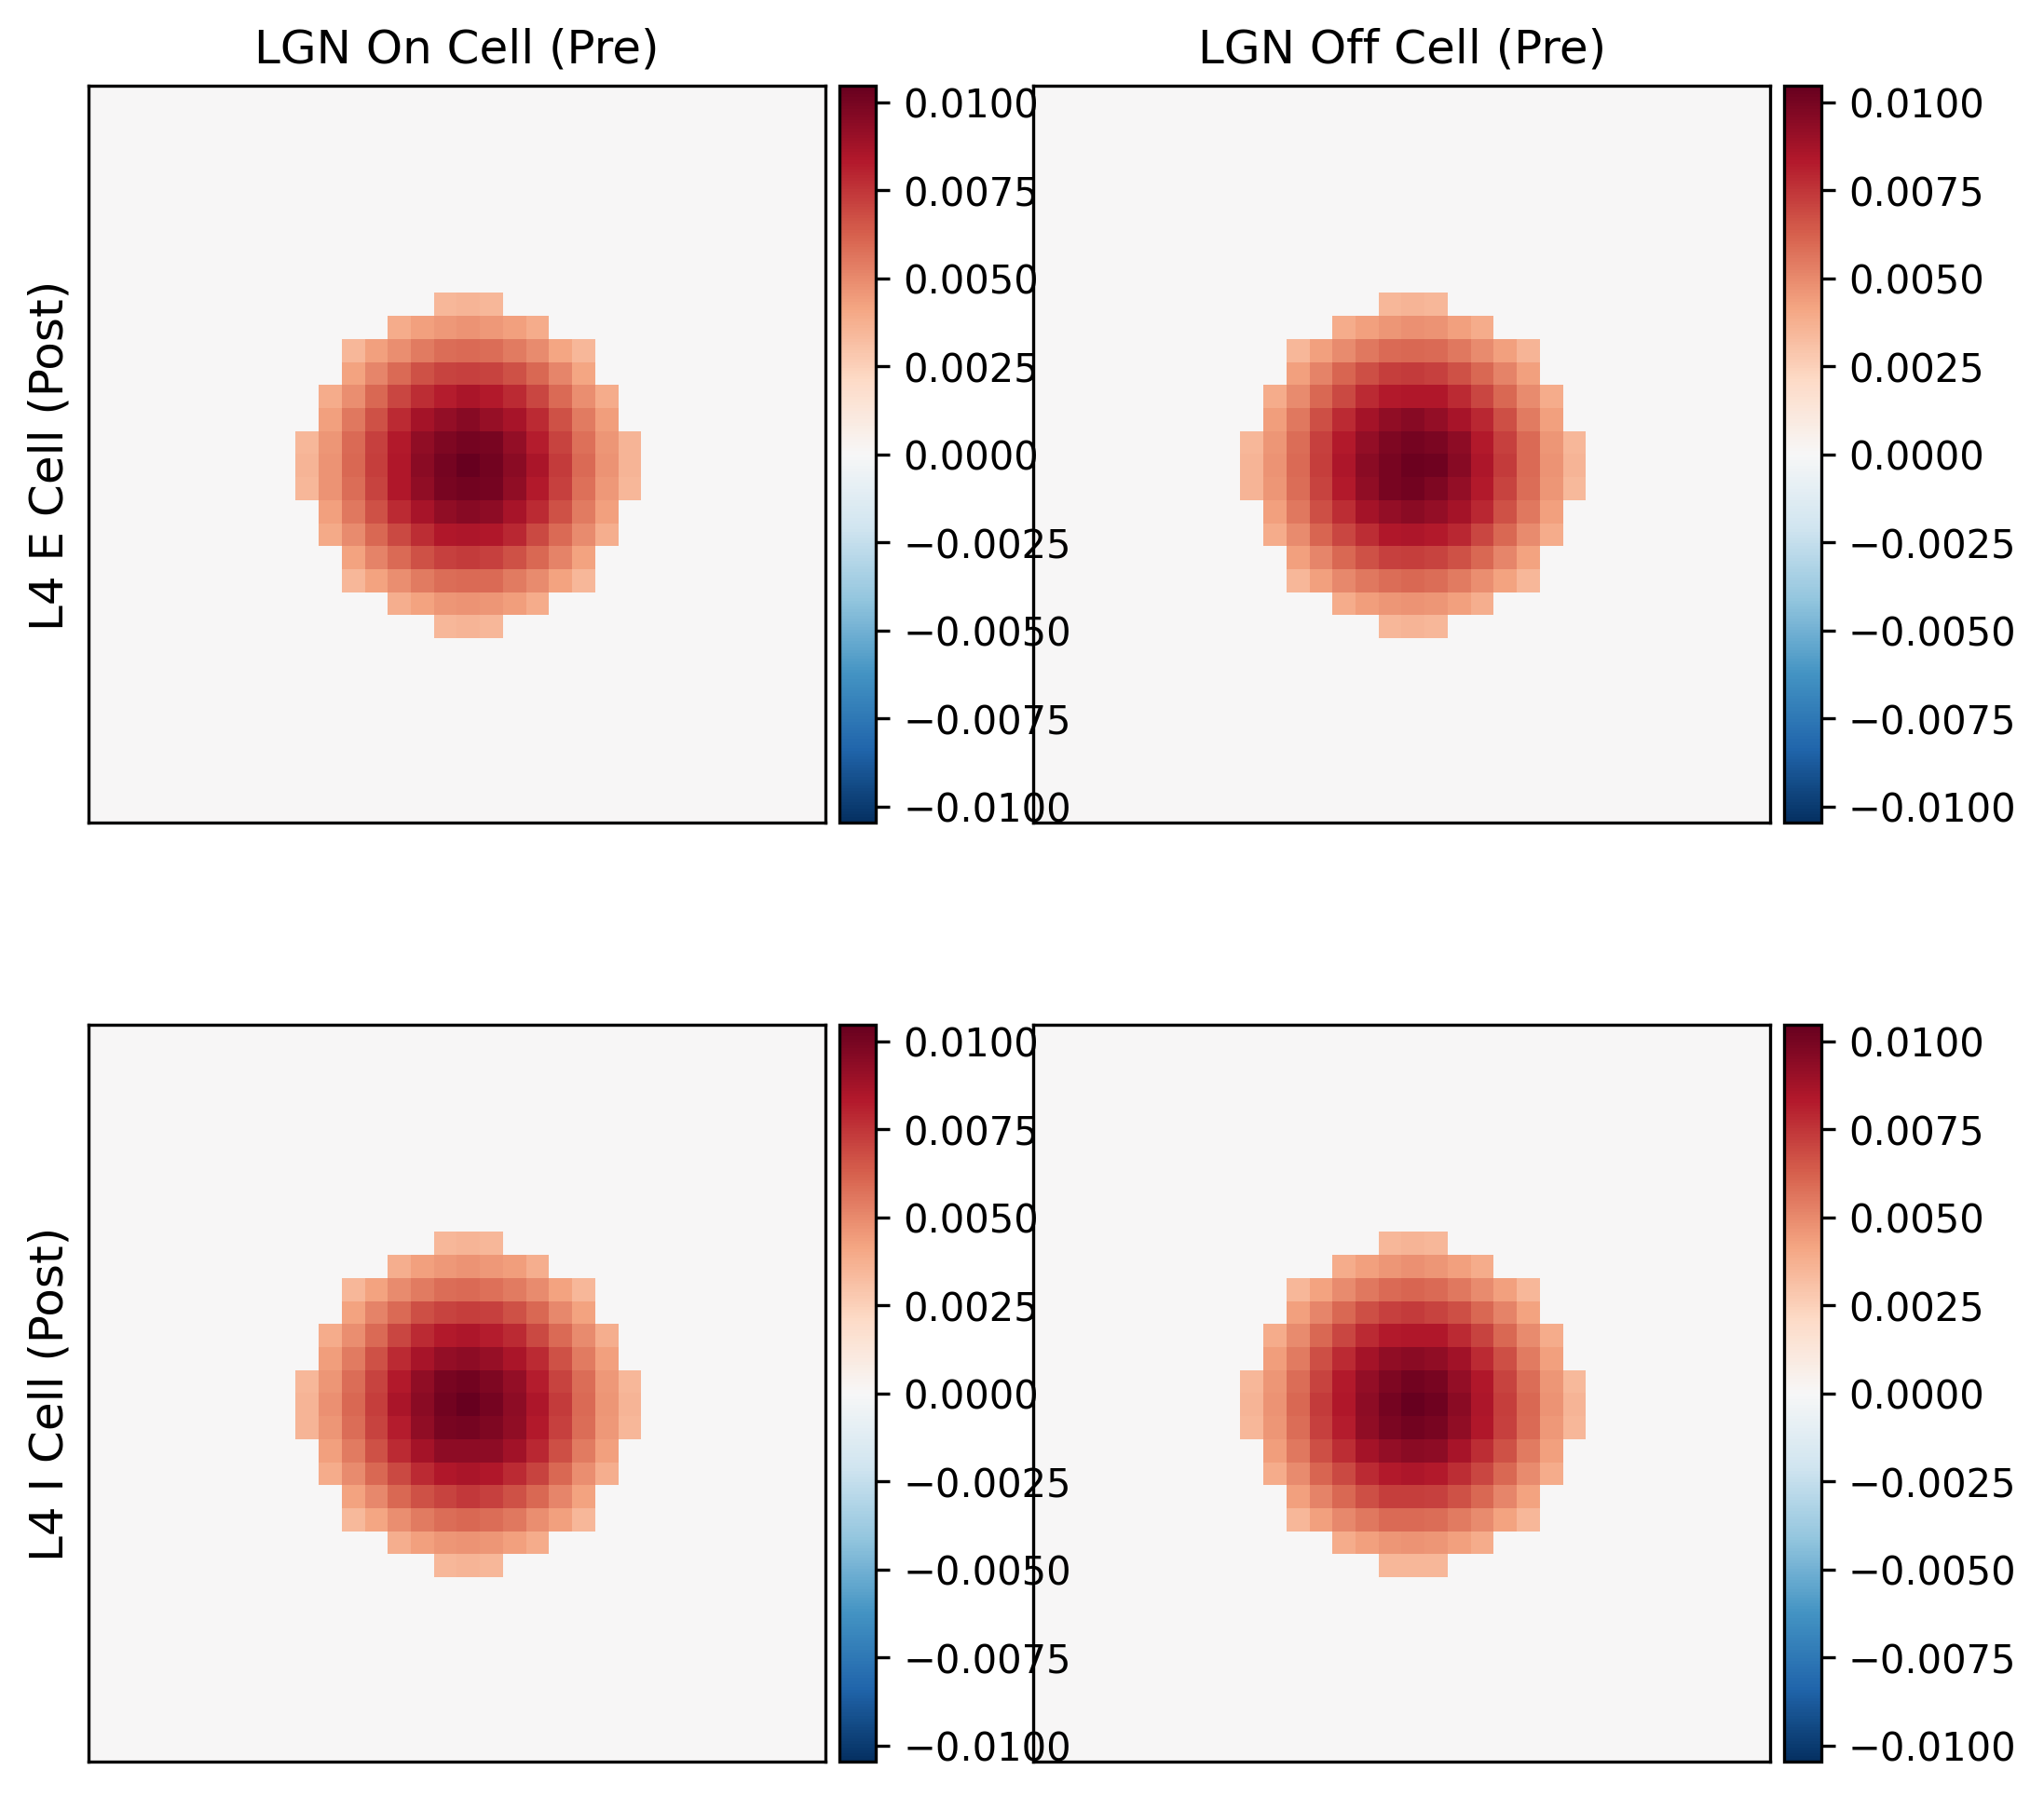

In [26]:
fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

pf.imshowbar(fig,axs[0,0],Wlgnto4[0].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(Wlgnto4)),vmax=np.max(np.abs(Wlgnto4)),cmap='RdBu_r')
pf.imshowbar(fig,axs[0,1],Wlgnto4[1].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(Wlgnto4)),vmax=np.max(np.abs(Wlgnto4)),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,0],Wlgnto4[2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(Wlgnto4)),vmax=np.max(np.abs(Wlgnto4)),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,1],Wlgnto4[3].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(Wlgnto4)),vmax=np.max(np.abs(Wlgnto4)),cmap='RdBu_r')
axs[0,0].set_ylabel('L4 E Cell (Post)',fontsize=12)
axs[1,0].set_ylabel('L4 I Cell (Post)',fontsize=12)
axs[0,0].set_title('LGN On Cell (Pre)',fontsize=12)
axs[0,1].set_title('LGN Off Cell (Pre)',fontsize=12)

1.0
-1.0017191
1.0000001
-1.0017191


Text(0.5, 1.0, 'L4 I Cell (Pre)')

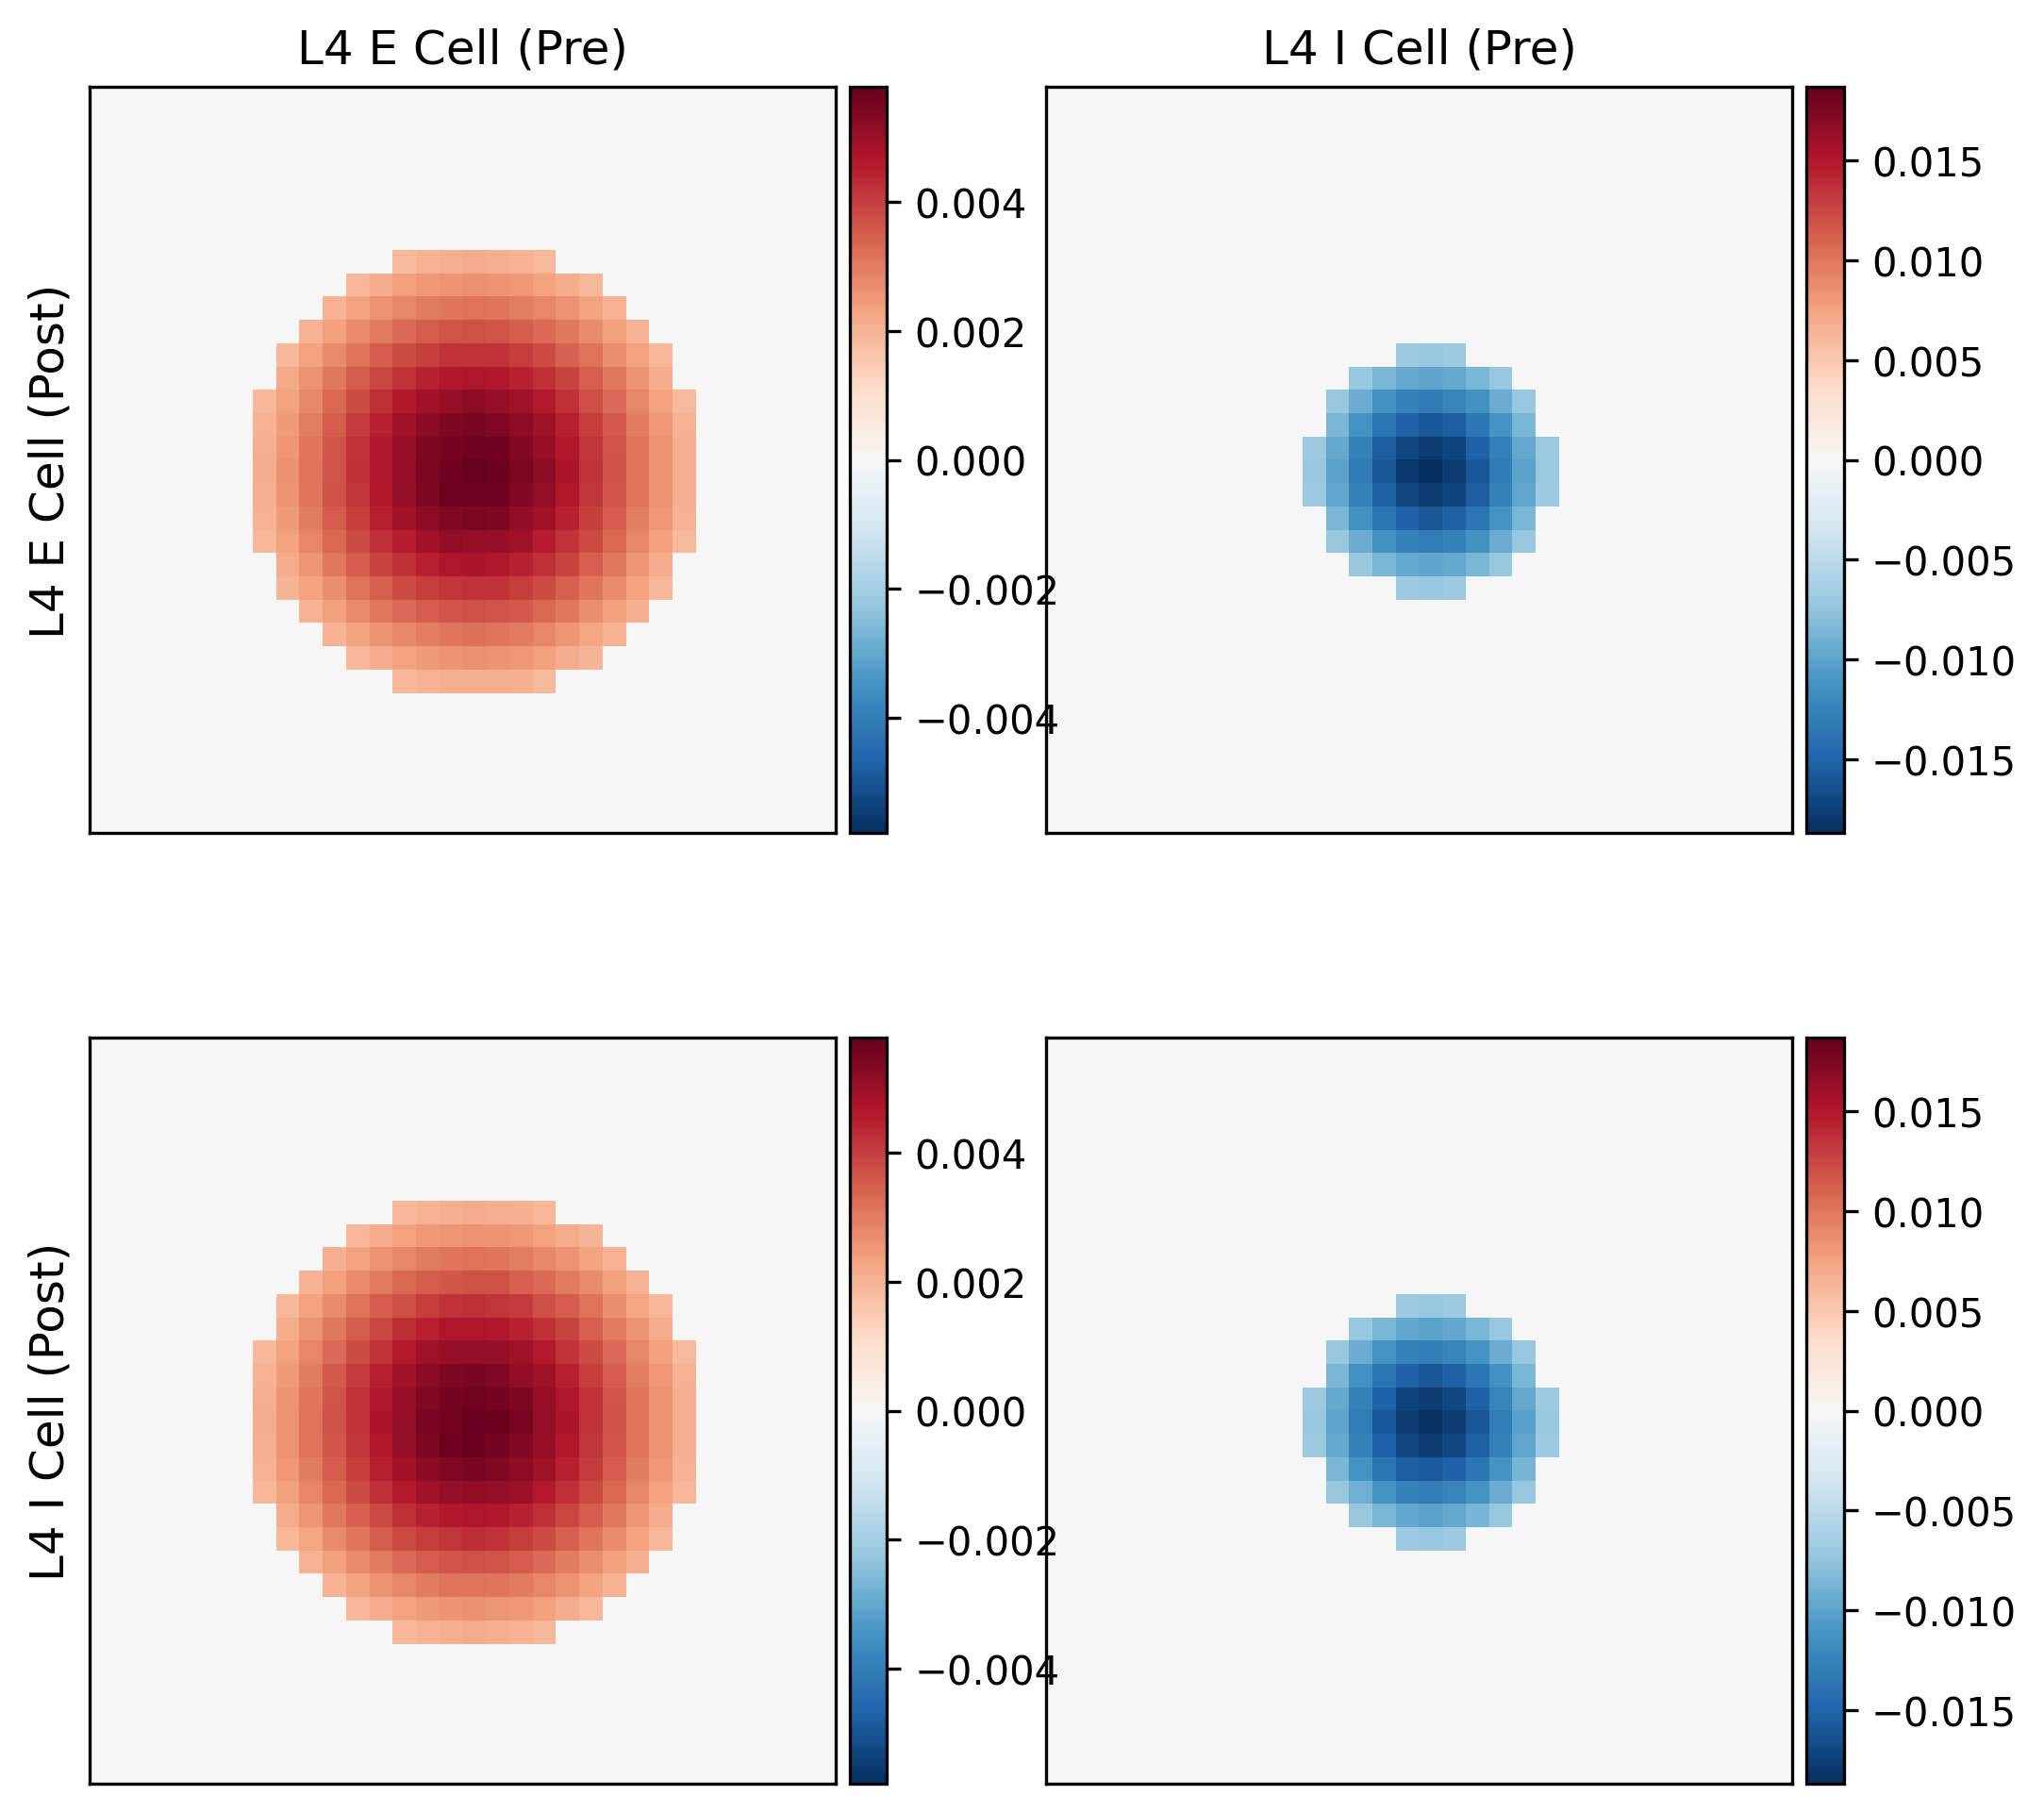

In [27]:
fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

pf.imshowbar(fig,axs[0,0],W4to4[:N4**2,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4[:N4**2,:N4**2])),vmax=np.max(np.abs(W4to4[:N4**2,:N4**2])),cmap='RdBu_r')
pf.imshowbar(fig,axs[0,1],W4to4[:N4**2,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4[:N4**2,N4**2:])),vmax=np.max(np.abs(W4to4[:N4**2,N4**2:])),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,0],W4to4[N4**2:,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4[N4**2:,:N4**2])),vmax=np.max(np.abs(W4to4[N4**2:,:N4**2])),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,1],W4to4[N4**2:,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4[N4**2:,N4**2:])),vmax=np.max(np.abs(W4to4[N4**2:,N4**2:])),cmap='RdBu_r')
print(np.sum(W4to4[:N4**2,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[:N4**2,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[N4**2:,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[N4**2:,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
axs[0,0].set_ylabel('L4 E Cell (Post)',fontsize=12)
axs[1,0].set_ylabel('L4 I Cell (Post)',fontsize=12)
axs[0,0].set_title('L4 E Cell (Pre)',fontsize=12)
axs[0,1].set_title('L4 I Cell (Pre)',fontsize=12)

# Test Initial Weights and Arbors

In [28]:
reload(misc)

config_name = "ffrec_test"

config_dict,N4pop,Nlgnpop,Nret,Nlgn,N4 = get_network_size(config_name)

MISC params_dict params_ffrec_test {'Nret': 32, 'Nlgn': 32, 'N4': 32, 'N23': 1, 'Nvert': 1, 'runtime': 500, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'q_dict': True, 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.0225, 'sigma2': 0.06, 'ampl1': 2.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.03375, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_eccentricity':

In [29]:
reload(network)
_,Wlgnto4,arbor_on,arbor_off,arbor2,_,W4to4,arbor4to4,_ = get_network_system(-1,config_name)

In [ ]:
print(Wlgnto4.shape)
Wlgnto4.reshape(N4pop,Nlgnpop,N4*N4,Nlgn*Nlgn)
                
fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

Wpresum = Wlgnto4.reshape(N4pop,Nlgnpop,N4**2,Nlgn**2).sum((3))
Wpstsum = Wlgnto4.reshape(N4pop,Nlgnpop,N4**2,Nlgn**2).sum((2))
for i in range(2):
    axs[0,0].hist(Wpresum[0,i],
                  bins=np.linspace(np.min(Wpresum[0,i])-0.05,np.max(Wpresum[0,i])+0.05,51),
                  density=True,color=['r','b'][i],alpha=0.5)
    axs[0,1].hist(Wpstsum[0,i],
                  bins=np.linspace(np.min(Wpstsum)-0.05,np.max(Wpstsum)+0.05,51),
                  density=True,color=['r','b'][i],alpha=0.5)
axs[0,0].hist(Wpresum[0].sum(0),
              bins=np.linspace(np.min(Wpresum[0].sum(0))-0.05,np.max(Wpresum[0].sum(0))+0.05,51),
              density=True,color='k',alpha=0.5)

Wpresum = np.abs(W4to4.reshape(N4pop,N4**2,N4pop,N4**2).transpose((0,2,1,3)).sum((3)))
Wpstsum = np.abs(W4to4.reshape(N4pop,N4**2,N4pop,N4**2).transpose((0,2,1,3)).sum((2)))
for i in range(2):
    axs[1,0].hist(Wpresum[0,i],
                  bins=np.linspace(np.min(Wpresum[0,i])-0.05,np.max(Wpresum[0,i])+0.05,51),
                  density=True,color=['r','b'][i],alpha=0.5)
    axs[1,1].hist(Wpstsum[0,i],
                  bins=np.linspace(np.min(Wpstsum)-0.05,np.max(Wpstsum)+0.05,51),
                  density=True,color=['r','b'][i],alpha=0.5)
axs[1,0].hist(Wpresum[0].sum(0),
              bins=np.linspace(np.min(Wpresum[0].sum(0))-0.05,np.max(Wpresum[0].sum(0))+0.05,51),
              density=True,color='k',alpha=0.5)

axs[0,0].set_ylabel('LGN Feedforward Weights',fontsize=16)
axs[1,0].set_ylabel('L4 Recurrent Weights',fontsize=16)
axs[0,0].set_title('Abs Val of Presyn Sum',fontsize=16)
axs[0,1].set_title('Abs Val of Postsyn Sum',fontsize=16)

# fig.suptitle(r'Sum of Incoming and Outgoing Connections')
fig.tight_layout()

(4, 1024, 1024)


Text(0.5, 1.0, 'LGN Off Cell (Pre)')

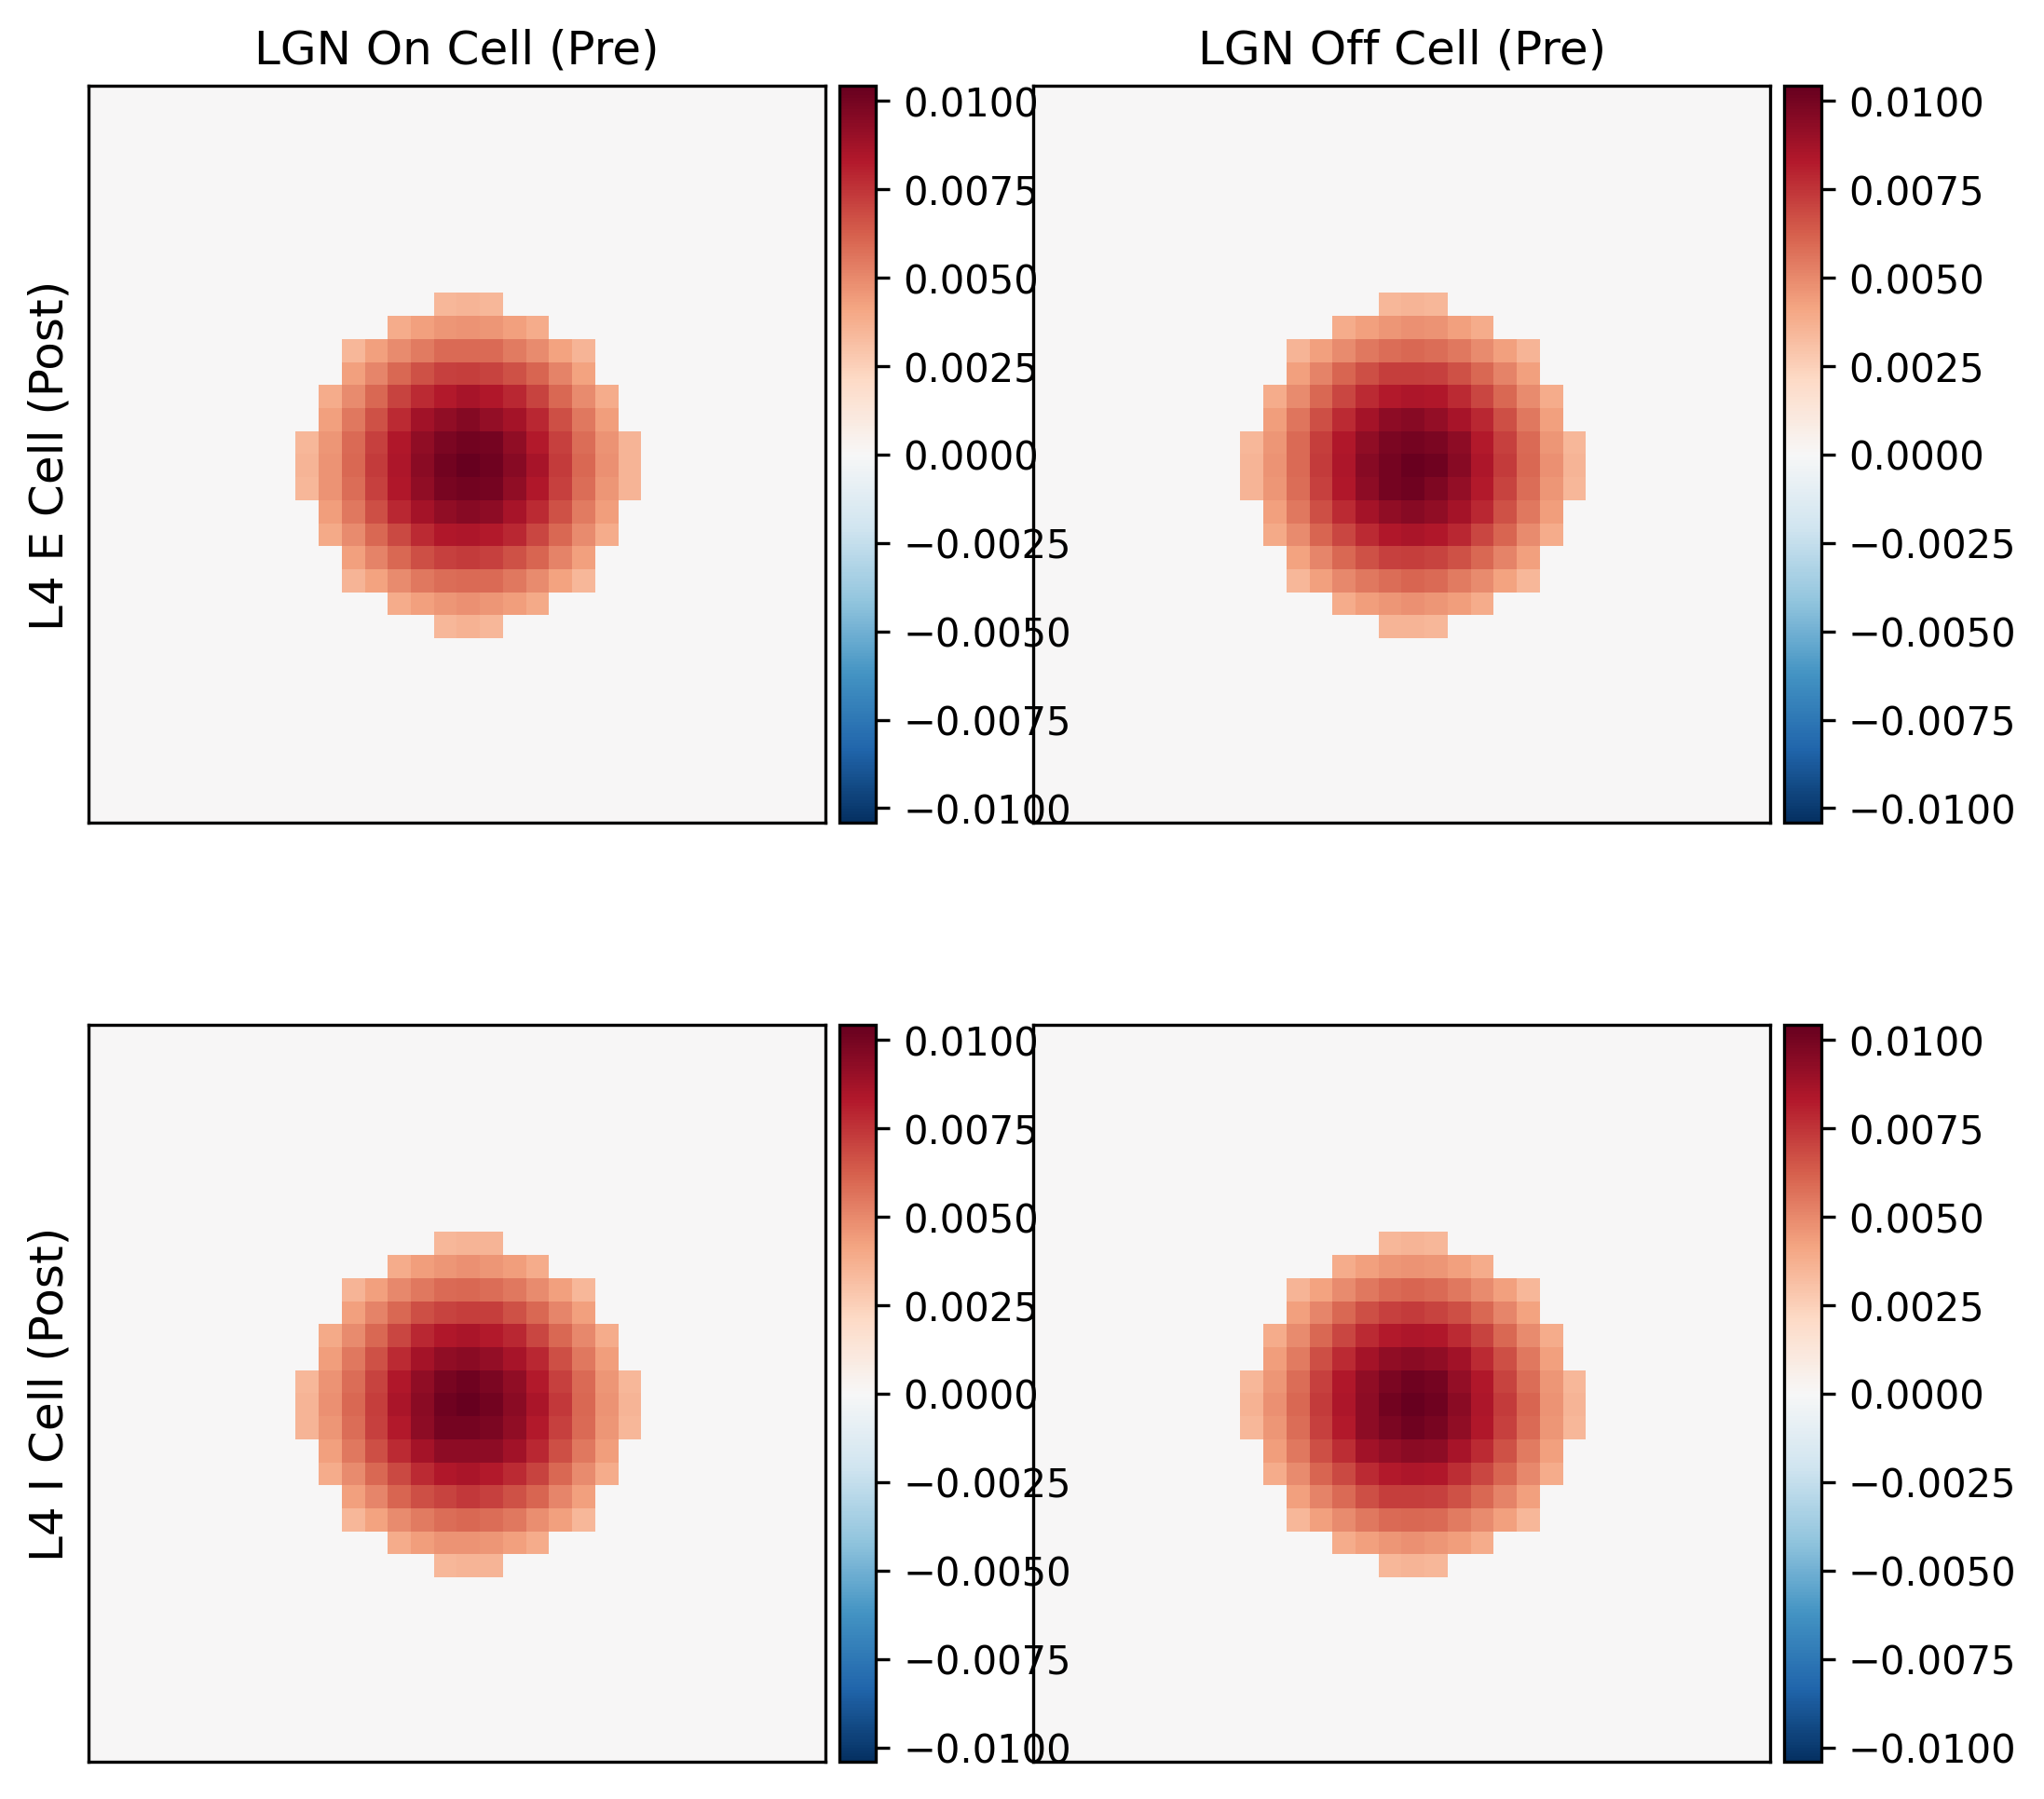

In [31]:
fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

pf.imshowbar(fig,axs[0,0],Wlgnto4[0].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(Wlgnto4)),vmax=np.max(np.abs(Wlgnto4)),cmap='RdBu_r')
pf.imshowbar(fig,axs[0,1],Wlgnto4[1].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(Wlgnto4)),vmax=np.max(np.abs(Wlgnto4)),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,0],Wlgnto4[2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(Wlgnto4)),vmax=np.max(np.abs(Wlgnto4)),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,1],Wlgnto4[3].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(Wlgnto4)),vmax=np.max(np.abs(Wlgnto4)),cmap='RdBu_r')
axs[0,0].set_ylabel('L4 E Cell (Post)',fontsize=12)
axs[1,0].set_ylabel('L4 I Cell (Post)',fontsize=12)
axs[0,0].set_title('LGN On Cell (Pre)',fontsize=12)
axs[0,1].set_title('LGN Off Cell (Pre)',fontsize=12)

Text(0.5, 1.0, 'LGN Off Cell (Pre)')

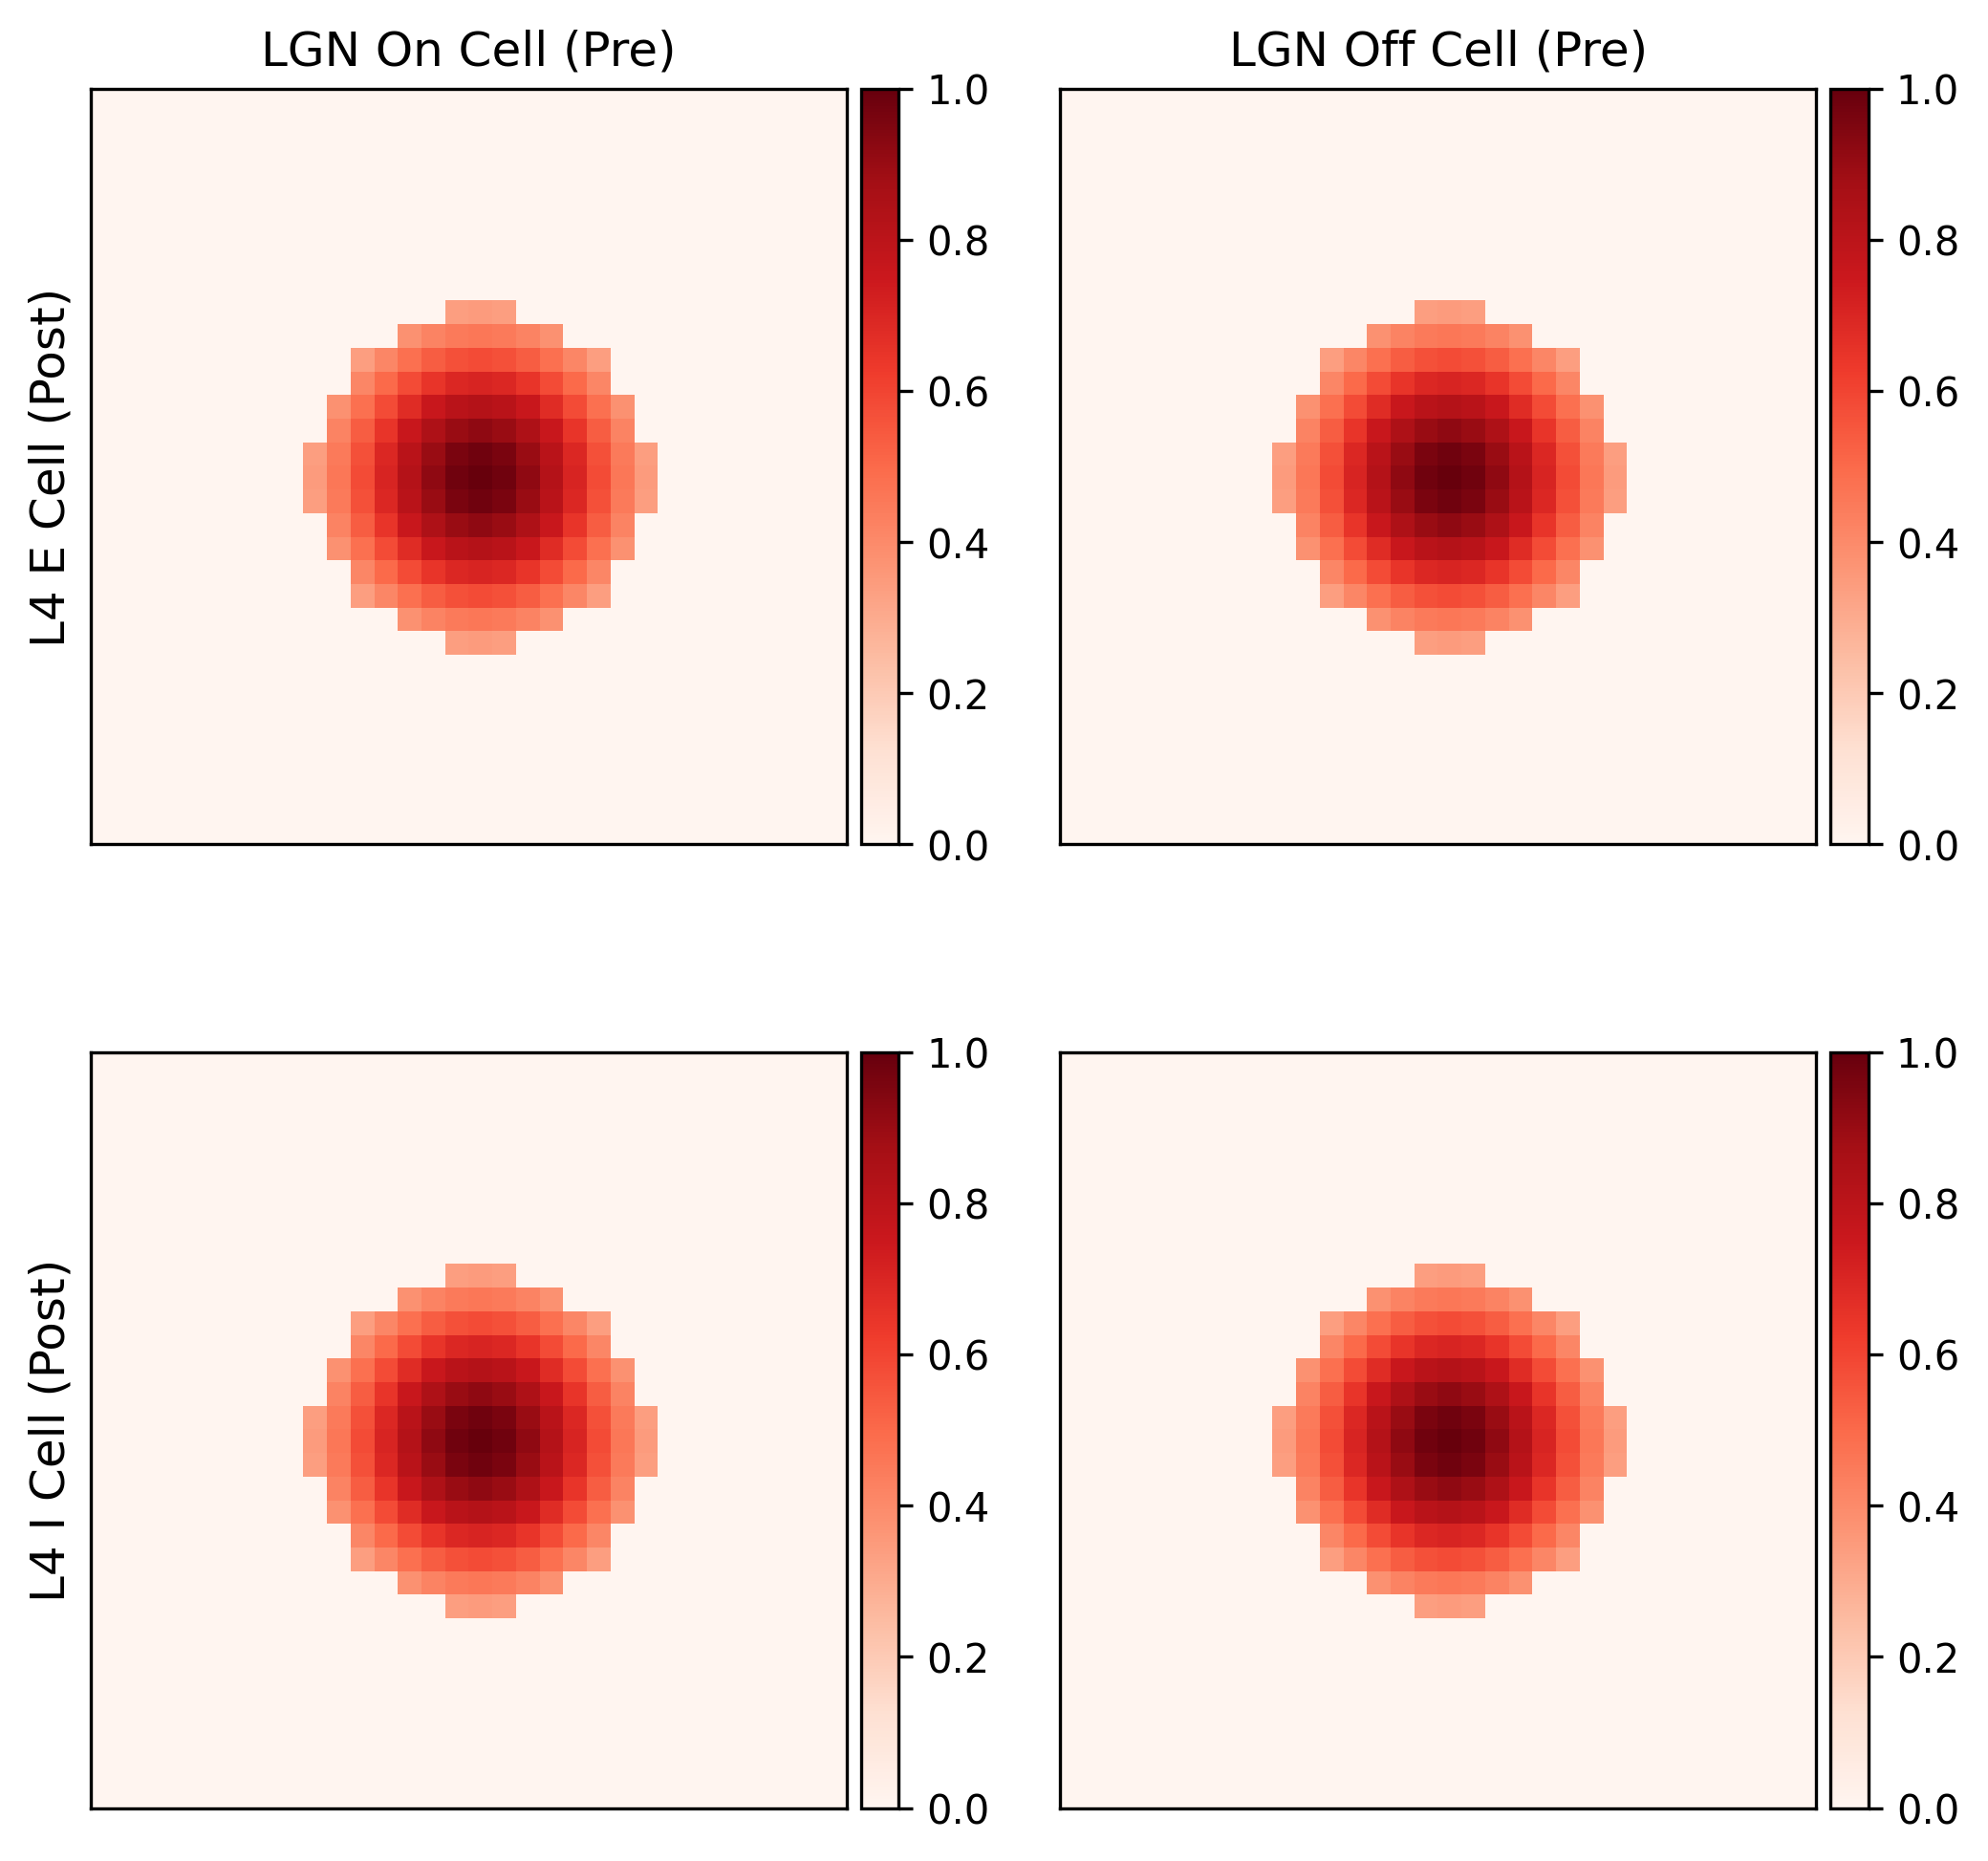

In [32]:
fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

pf.imshowbar(fig,axs[0,0],arbor2[0].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=0,vmax=np.max(np.abs(arbor2)),cmap='Reds')
pf.imshowbar(fig,axs[0,1],arbor2[1].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=0,vmax=np.max(np.abs(arbor2)),cmap='Reds')
pf.imshowbar(fig,axs[1,0],arbor2[2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=0,vmax=np.max(np.abs(arbor2)),cmap='Reds')
pf.imshowbar(fig,axs[1,1],arbor2[3].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=0,vmax=np.max(np.abs(arbor2)),cmap='Reds')
axs[0,0].set_ylabel('L4 E Cell (Post)',fontsize=12)
axs[1,0].set_ylabel('L4 I Cell (Post)',fontsize=12)
axs[0,0].set_title('LGN On Cell (Pre)',fontsize=12)
axs[0,1].set_title('LGN Off Cell (Pre)',fontsize=12)

1.0
-1.0
1.0
-0.9999999999999997


Text(0.5, 1.0, 'L4 I Cell (Pre)')

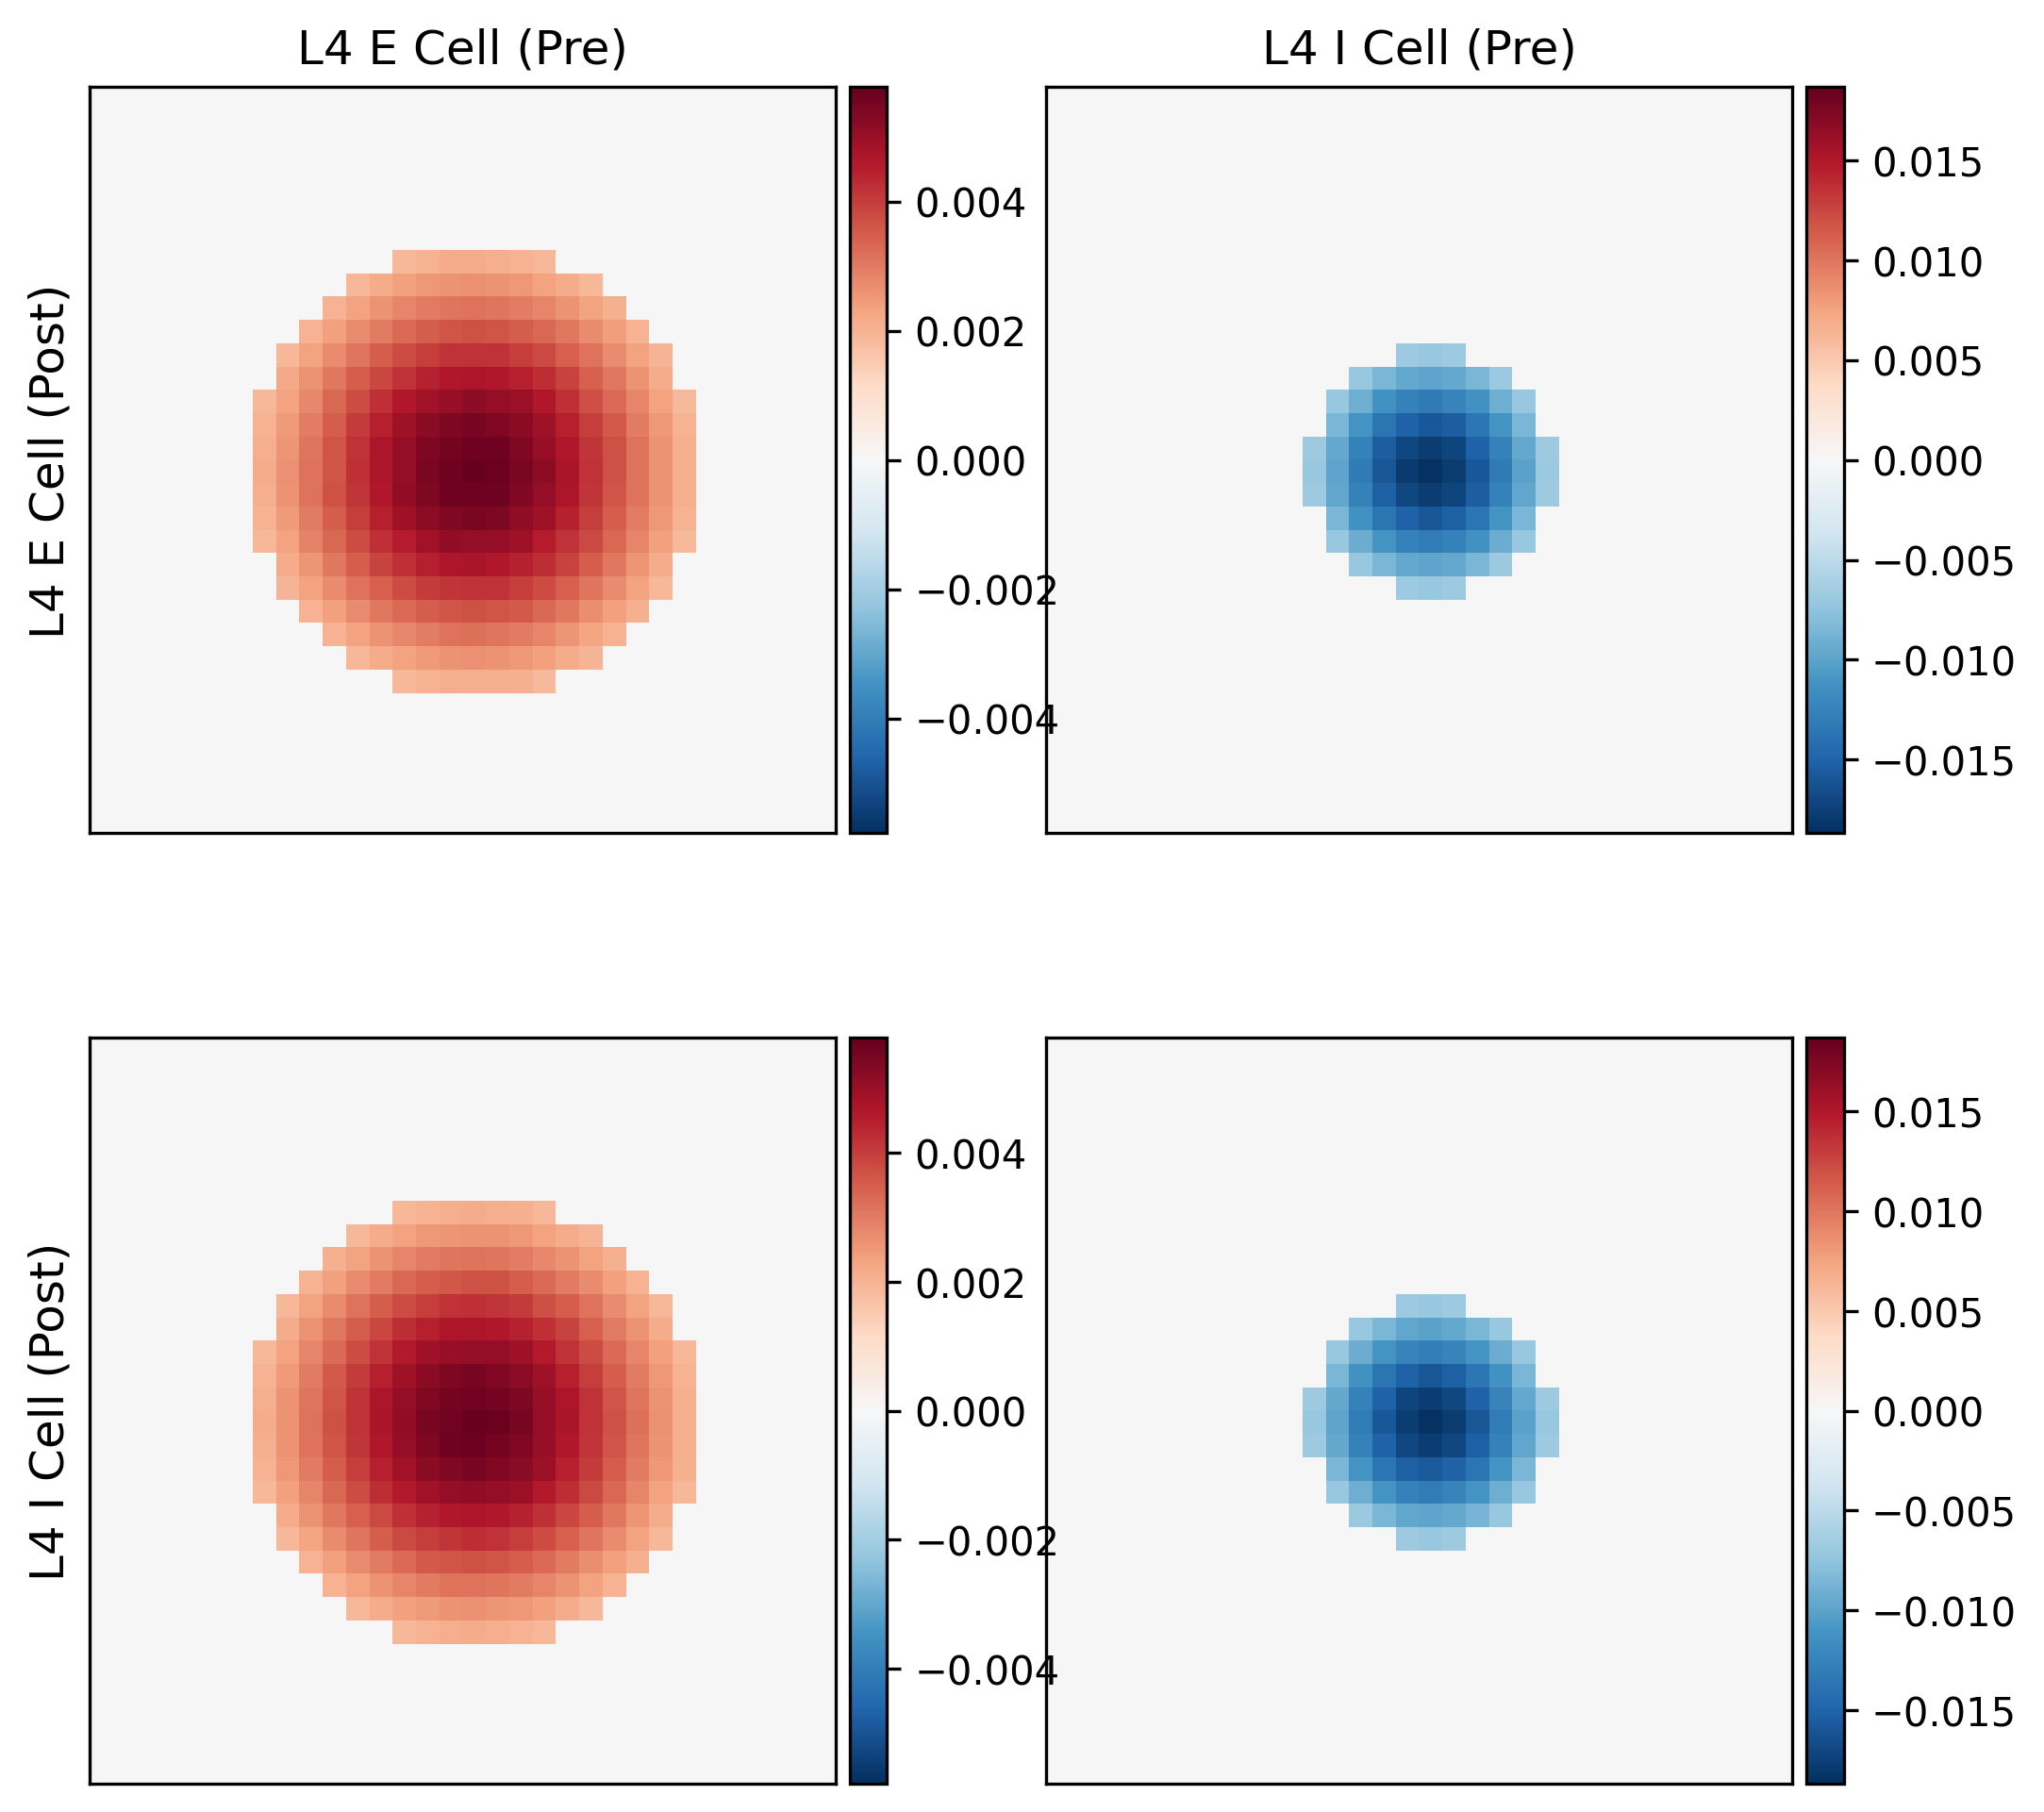

In [33]:
fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

pf.imshowbar(fig,axs[0,0],W4to4[:N4**2,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4[:N4**2,:N4**2])),vmax=np.max(np.abs(W4to4[:N4**2,:N4**2])),cmap='RdBu_r')
pf.imshowbar(fig,axs[0,1],W4to4[:N4**2,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4[:N4**2,N4**2:])),vmax=np.max(np.abs(W4to4[:N4**2,N4**2:])),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,0],W4to4[N4**2:,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4[N4**2:,:N4**2])),vmax=np.max(np.abs(W4to4[N4**2:,:N4**2])),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,1],W4to4[N4**2:,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4[N4**2:,N4**2:])),vmax=np.max(np.abs(W4to4[N4**2:,N4**2:])),cmap='RdBu_r')
print(np.sum(W4to4[:N4**2,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[:N4**2,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[N4**2:,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[N4**2:,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
axs[0,0].set_ylabel('L4 E Cell (Post)',fontsize=12)
axs[1,0].set_ylabel('L4 I Cell (Post)',fontsize=12)
axs[0,0].set_title('L4 E Cell (Pre)',fontsize=12)
axs[0,1].set_title('L4 I Cell (Pre)',fontsize=12)

1.0
-1.0
1.0
-0.9999999999999997


Text(0.5, 1.0, 'L4 I Cell (Pre)')

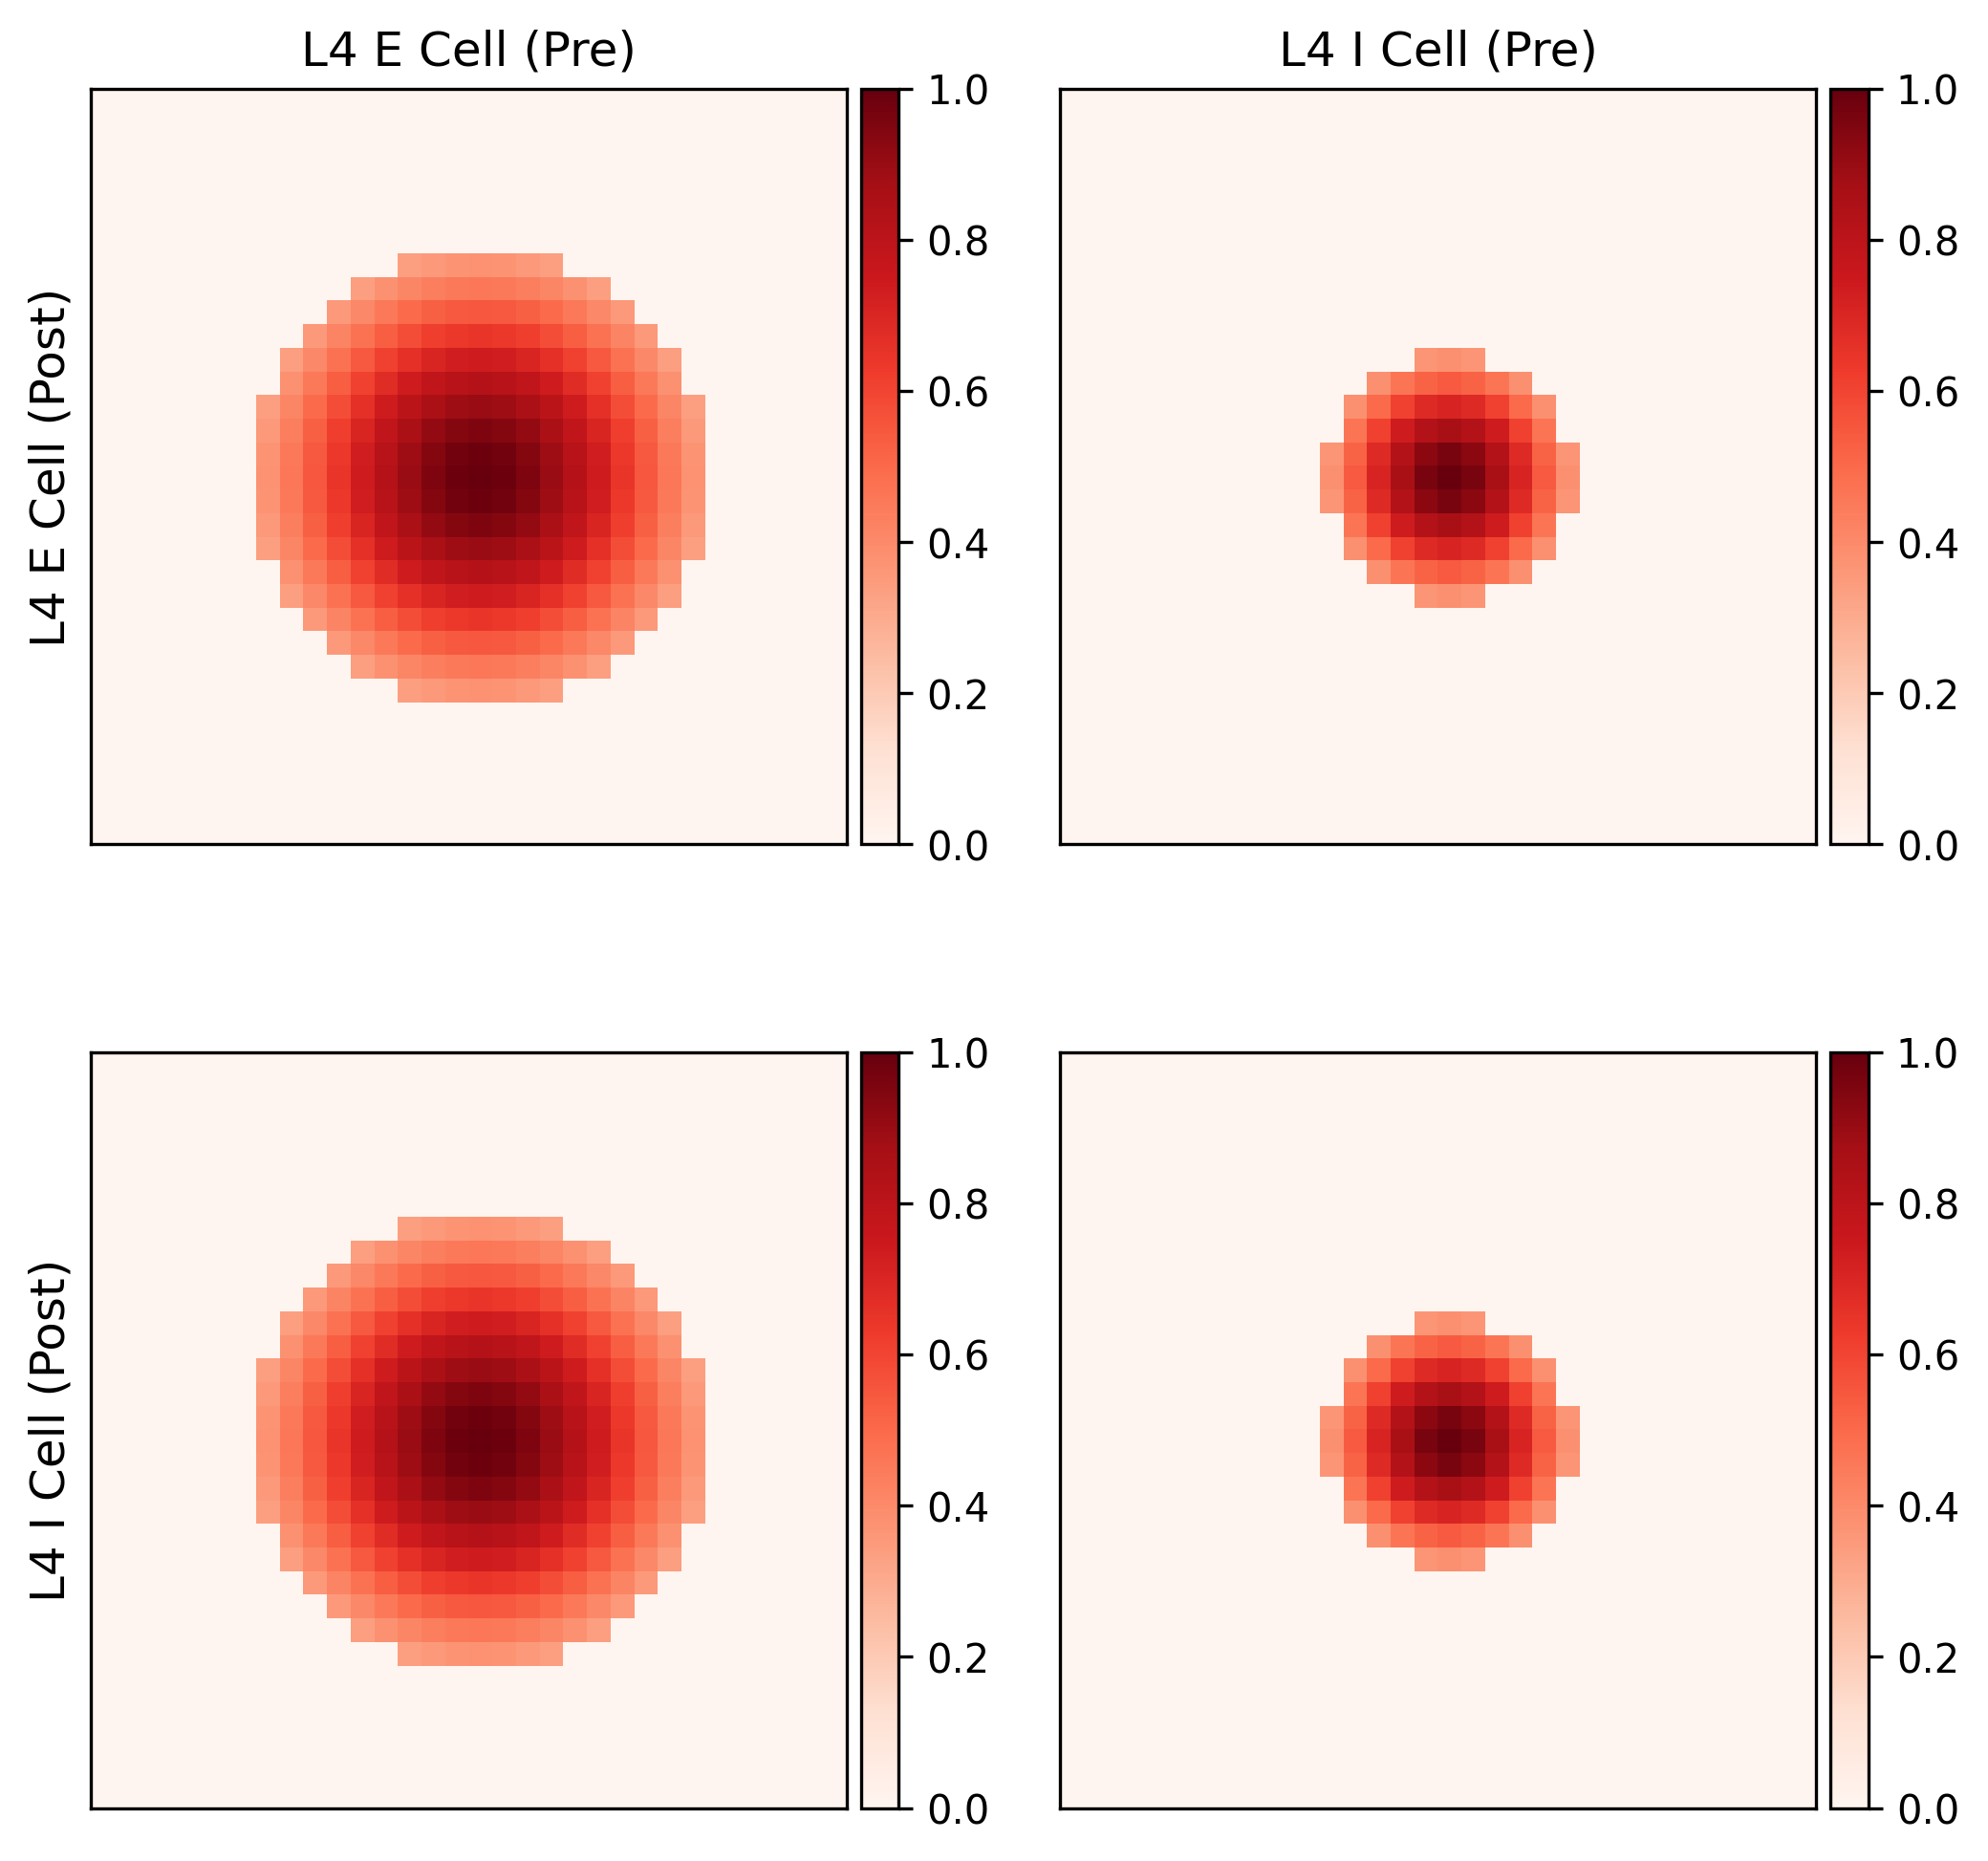

In [34]:
fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

pf.imshowbar(fig,axs[0,0],arbor4to4[:N4**2,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=0,vmax=np.max(np.abs(arbor4to4)),cmap='Reds')
pf.imshowbar(fig,axs[0,1],arbor4to4[:N4**2,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=0,vmax=np.max(np.abs(arbor4to4)),cmap='Reds')
pf.imshowbar(fig,axs[1,0],arbor4to4[N4**2:,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=0,vmax=np.max(np.abs(arbor4to4)),cmap='Reds')
pf.imshowbar(fig,axs[1,1],arbor4to4[N4**2:,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=0,vmax=np.max(np.abs(arbor4to4)),cmap='Reds')
print(np.sum(W4to4[:N4**2,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[:N4**2,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[N4**2:,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[N4**2:,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
axs[0,0].set_ylabel('L4 E Cell (Post)',fontsize=12)
axs[1,0].set_ylabel('L4 I Cell (Post)',fontsize=12)
axs[0,0].set_title('L4 E Cell (Pre)',fontsize=12)
axs[0,1].set_title('L4 I Cell (Pre)',fontsize=12)

In [25]:
reload(misc)

<module 'dev_ori_sel_RF.tools.misc' from '/Users/tuannguyen/OrientationSSB/notebooks/./../dev_ori_sel_RF/tools/misc.py'>

In [26]:
reload(run_full_plastic)
# reload(integrator_tf)
Version = 0
run_full_plastic.parameter_sweep_layer4(Version,config_dict,not_saving_temp=False)

Please install GPU version of TF
# of stimuli: 16
mode in get_RFs initializegauss
CHECK radius 0.15
CHECK radius 0.15
mode in get_RFs initializegauss
CHECK radius 0.15
CHECK radius 0.15
mode in get_RFs initializegauss
CHECK radius 0.25
mode in get_RFs initializegauss
CHECK radius 0.25
mode in get_RFs initializegauss
CHECK radius 0.15
mode in get_RFs initializegauss
CHECK radius 0.15
W4to4 (800, 800)
constraint_vec (2398, 96800)
[Errno 2] No such file or directory: '/Users/tuannguyen/OrientationSSB/dev_ori_sel_RF/data/layer4/P_orth/N420_rec_rAon0.25_rAoff0.0_rlim2.0_gaussian.npy'
No file found for projection operator
 generating operator now...


AttributeError: 'bool' object has no attribute 'astype'